# Dataset exploration

## Load and plot fMRI and T1 scan

We will first load the dataset with mne. Then we will use them with nilearn or sklearn

File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-4_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-5_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-6_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-7_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-8_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-02/func/sub-02_task-sleep_run-1_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-02/func/sub-02_task-sleep_run-2_bold.nii.gz not found.
File /

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


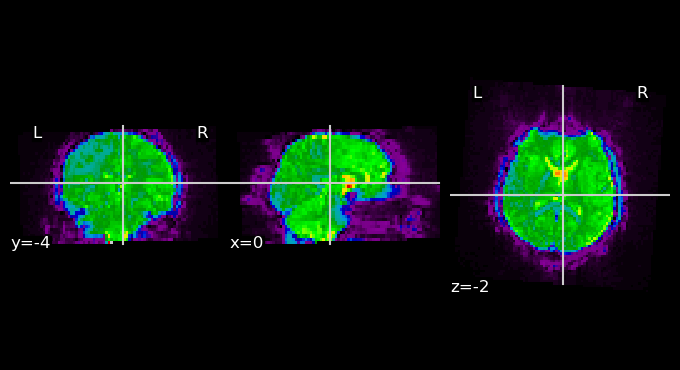

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


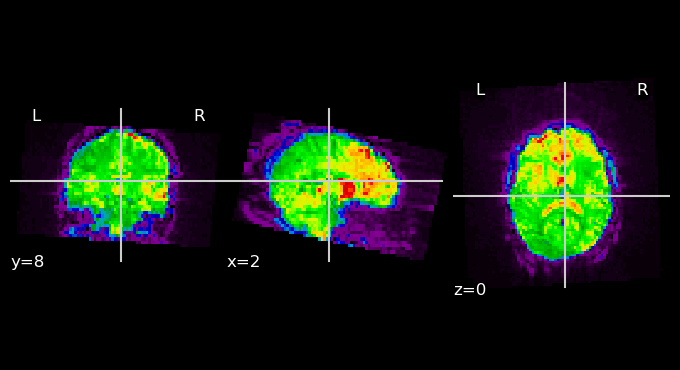

T1 image: 


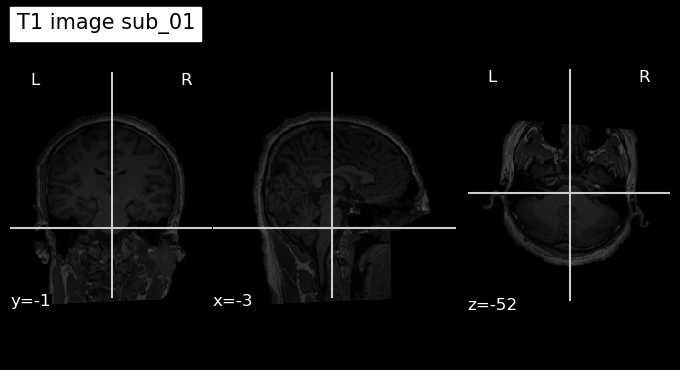

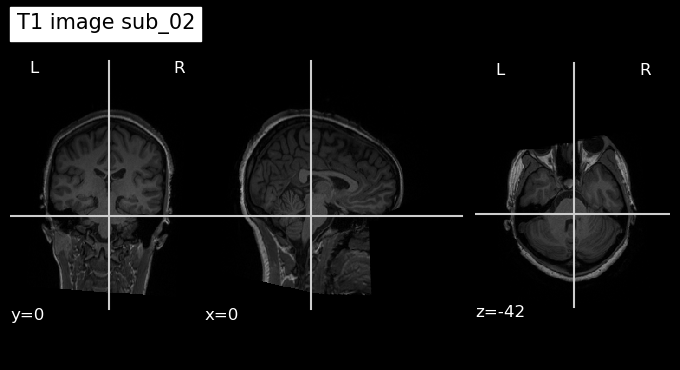

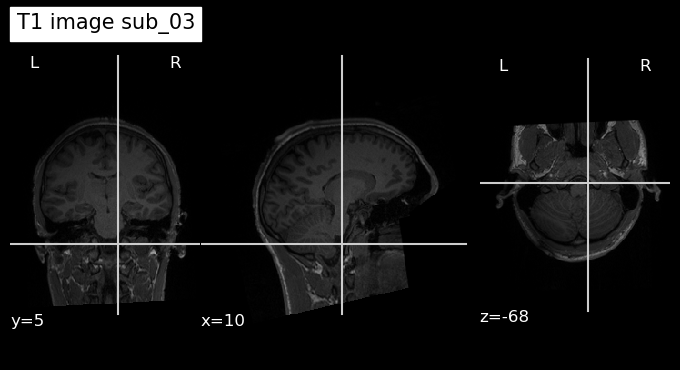

In [2]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import mne

# Fonction pour charger les fichiers fMRI
def load_fmri_and_T1_data(dataset_path, subjects, sessions):
    fmri_images = []
    T1_images = []
    for subj in subjects:
        # Chemin vers l'image T1
        t1_img_path = os.path.join(dataset_path, subj, 'anat', f'{subj}_T1w.nii.gz')
        if os.path.exists(t1_img_path):
            T1_img = nib.load(t1_img_path)
            T1_images.append(T1_img)
            
            for sess in sessions:
                fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
                if os.path.exists(fmri_path):
                    fmri_img = nib.load(fmri_path)
                    fmri_images.append(fmri_img)
                    
                else:
                    print(f"File {fmri_path} not found.")
        else:
            print(f"File {t1_img_path} not found.")
    return fmri_images, T1_images

# Fonction pour visualiser une image 4D
def visualize_4d_fmri(fmri_img):
    # Sélectionner la première image temporelle pour la visualisation
    first_volume = image.index_img(fmri_img, 0)
    plotting.plot_epi(first_volume)
    plt.show()

########## Main ###########
# Définir le chemin de base vers les données
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'

# Liste des sujets à charger
subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
for i in range(10, 34):
    subjects.append(f'sub-{i:02d}')
#subjects = ['sub-01']

# Liste des sessions
sessions = ['task-rest_run-1', 'task-rest_run-2' ] + [f'task-sleep_run-{i}' for i in range(1, 9)]

# Charger les données fMRI
fmri_images, T1_images = load_fmri_and_T1_data(dataset_path, subjects, sessions)
print("Number of fmri_images : ", len(fmri_images))
print("Number of T1_images : ", len(T1_images))

# Visualiser les images fMRI
# for img in fmri_images:
#     visualize_4d_fmri(img)
print("fMRI images :")
visualize_4d_fmri(fmri_images[0])
visualize_4d_fmri(fmri_images[5])
print("T1 image: ")
for i in range (0, 3):
    plotting.plot_anat(T1_images[i], title=f"T1 image sub_0{i+1}")
    plt.show()



## Read CSV file to know when sleeping

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


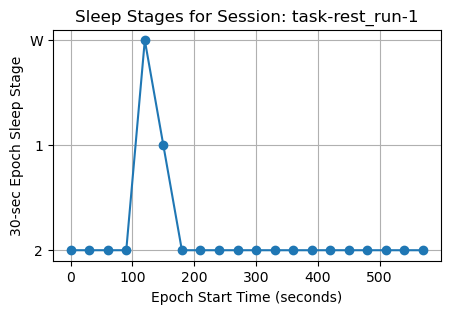

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


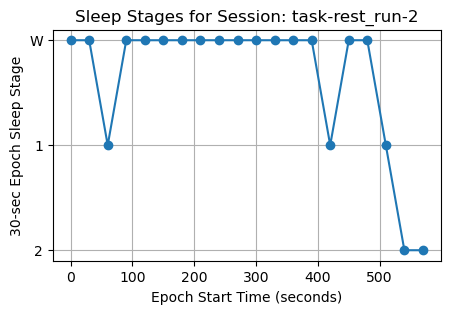

No data available for session: task-rest_run-3
No data available for session: task-rest_run-4
No data available for session: task-rest_run-5
No data available for session: task-rest_run-6
No data available for session: task-rest_run-7
No data available for session: task-rest_run-8


/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


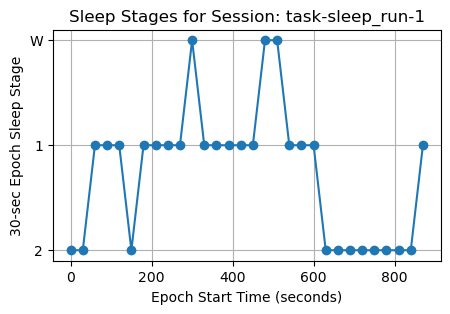

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


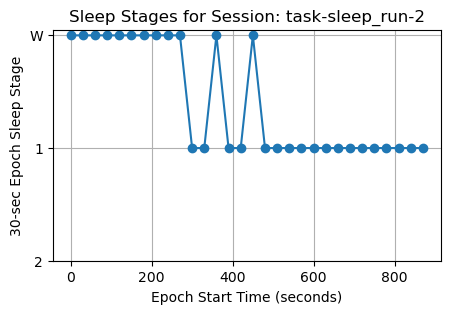

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


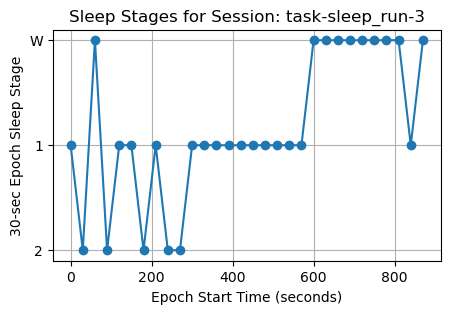

No data available for session: task-sleep_run-4
No data available for session: task-sleep_run-5
No data available for session: task-sleep_run-6
No data available for session: task-sleep_run-7
No data available for session: task-sleep_run-8


In [31]:
import pandas as pd

# Numero du sujet a plot
subj = 'sub-01'

# Chemin vers le fichier TSV
tsv_file = os.path.join(dataset_path, 'sourcedata',f'{subj}-sleep-stage.tsv')

# Lire le fichier TSV avec pandas
sleep_data = pd.read_csv(tsv_file, sep='\t')

for session in sessions:
    session_data = sleep_data[sleep_data['session'] == session]

    if not session_data.empty:
        # Mapper les stades de sommeil à des valeurs numériques
        stage_mapping = {'W': 2, '1': 1, '2': 0}
        session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)

        # Tracer 30-sec_epoch_sleep_stage en fonction de epoch_start_time_sec
        plt.figure(figsize=(5, 3))
        plt.plot(session_data['epoch_start_time_sec'], session_data['sleep_stage_mapped'], marker='o', linestyle='-')
        plt.yticks([2, 1, 0], ['W', '1', '2'])  # Définir les labels de l'axe y
        plt.xlabel('Epoch Start Time (seconds)')
        plt.ylabel('30-sec Epoch Sleep Stage')
        plt.title(f'Sleep Stages for Session: {session}')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for session: {session}")

## Data normalisation

To have significant results we need to have consistent data that are all normalized. Let's plot two examples of data :

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


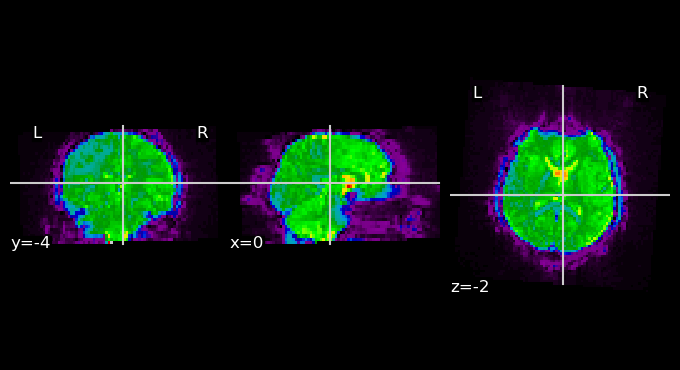

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


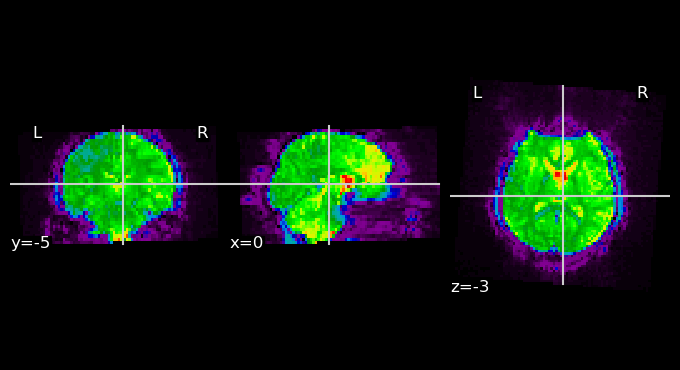

In [5]:

# Fonction pour visualiser une image 4D
def visualize_4d_fmri(fmri_img):
    # Sélectionner la première image temporelle pour la visualisation
    first_volume = image.index_img(fmri_img, 0)
    plotting.plot_epi(first_volume)
    plt.show()
    

visualize_4d_fmri(fmri_images[0])
visualize_4d_fmri(fmri_images[4])

Here, it's clear that the images are not oriented the same and that we have some parts of the data that are not usefull for our study like the background.

    fmri_data = fmri_img.get_fdata() extrait les intensités des voxels de l'image fMRI, permettant une manipulation et une analyse ultérieures de ces données.


## Fixing temporal resolution

First, what is the problem ?

In [8]:
import os
import nibabel as nib
import pandas as pd

# Définir les chemins
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-01'
session = 'task-rest_run-1'  # Exemple de session, à remplacer par la session souhaitée

# Charger les données fMRI
fmri_path = os.path.join(dataset_path, subject, 'func', f'{subject}_{session}_bold.nii.gz')
if os.path.exists(fmri_path):
    fmri_img = nib.load(fmri_path)
    fmri_data = fmri_img.get_fdata()
    num_volumes = fmri_data.shape[-1]  # Nombre de volumes
    header = fmri_img.header
    tr = header.get_zooms()[-1]  # Temps de répétition (TR)
    acquisition_time = num_volumes * tr  # Temps total d'acquisition
    print(f'Nombre de volumes d\'IRM pour {subject} {session}: {num_volumes}')
    print(f'Temps d\'acquisition pour {subject} {session}: {acquisition_time:.2f} secondes')
else:
    print(f'File {fmri_path} not found.')

# Charger les données de sommeil
tsv_file = os.path.join(dataset_path, 'sourcedata', f'{subject}-sleep-stage.tsv')
if os.path.exists(tsv_file):
    sleep_data = pd.read_csv(tsv_file, sep='\t')
    session_data = sleep_data[sleep_data['session'] == session]
    num_labels = len(session_data)
    total_label_time = num_labels * 30  # 30 secondes par label
    print(f'Nombre total de labels pour {subject} {session}: {num_labels}')
    print(f'Temps total d\'acquisition des labels pour {subject} {session}: {total_label_time} secondes')
else:
    print(f'File {tsv_file} not found.')

Nombre de volumes d'IRM pour sub-01 task-rest_run-1: 286
Temps d'acquisition pour sub-01 task-rest_run-1: 600.60 secondes
Nombre total de labels pour sub-01 task-rest_run-1: 20
Temps total d'acquisition des labels pour sub-01 task-rest_run-1: 600 secondes


On voit sur cet exemple de code que la résolution temporelle entre les label et les images fmri n'est pas la même. C'est un problème pour notre étude. Deux manière de régler ce problème : 
1. On augmente le nombre de label pour corrspondre au nombre de fMRI en extrapolant 
2. On ne selectionne que les données fMRI pour qui on a un label

Extrapoler des données n'est que très rarement une bonne idée donc nous allons rester sur la solution 2. Le problème c'est qu'on sait pas exactement quand son prises les données pour asssigner les labels et si ils sont associés ou non a une image fMRI précise. Pour remédier à ce problème nous pouvons :
1. Selectionner les images fMRI aux temps de mesure des label en espérant que ça corresponde
2. Si ça ne marche pas on pourra dans un second temps faire une moyenne des fMRI autour du point de label mais là encore il y a des limites

### Solution 1 : sélectionner les données correspondant aux labels

In [9]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn import image, plotting
import matplotlib.pyplot as plt

# Fonction pour charger les fichiers fMRI et les labels des fichiers TSV
def load_labeled_fmri_data(dataset_path, subjects, sessions):
    all_fmri_images = []
    all_labels = []

    for subj in subjects:
        print("****************\nLoading subject:", subj)
        tsv_file_path = os.path.join(dataset_path, 'sourcedata', f'{subj}-sleep-stage.tsv')
        
        if os.path.exists(tsv_file_path):
            sleep_data = pd.read_csv(tsv_file_path, sep='\t')

            for sess in sessions:
                fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
                
                if os.path.exists(fmri_path):
                    fmri_img = nib.load(fmri_path)

                    # Filtrer les données pour la session actuelle
                    session_data = sleep_data[sleep_data['session'] == sess].copy()
                    if not session_data.empty:
                        # Mapper les stades de sommeil à des valeurs numériques
                        stage_mapping = {'W': 0, '1': 1, '2': 2, '3': 3}  # 0 pour éveil, 1 pour sommeil
                        session_data.loc[:, 'sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)
                        
                        # Nombre de points temporels à considérer
                        tr = fmri_img.header.get_zooms()[-1]  # Utiliser le TR réel de l'acquisition fMRI
                        interval = int(30 / tr)
                        num_labels = len(session_data)
                        
                        # Créer une liste pour stocker les images 3D correspondant aux labels
                        labeled_images = []
                        for i in range(num_labels):
                            idx = i * interval
                            fmri_img_3d = image.index_img(fmri_img, idx)
                            labeled_images.append(fmri_img_3d)

                        all_fmri_images.append(labeled_images)
                        all_labels.append(session_data['sleep_stage_mapped'].values)
                        
                        print(f"\nSession {sess} for subject {subj}: {session_data['sleep_stage_mapped'].values}")
                        print(f"Number of labels for session {sess}: {len(session_data['sleep_stage_mapped'].values)}")

                    else:
                        print(f"No data available for session: {sess}")
                else:
                    print(f"File {fmri_path} not found.")
        else:
            print(f"File {tsv_file_path} not found.")
    
    return all_fmri_images, all_labels

########## Main ###########
# Définir le chemin de base vers les données
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'

# Liste des sujets à charger
subjects = ['sub-01', 'sub-02']

# Liste des sessions
sessions = ['task-rest_run-1'] + ['task-rest_run-2'] + [f'task-sleep_run-{i}' for i in range(1, 9)]
print("Nombre de sessions : ", len(sessions))
print (sessions)

# Charger les données fMRI et les labels correspondants
fmri_images, labels = load_labeled_fmri_data(dataset_path, subjects, sessions)
if (len(fmri_images) == len(labels)):
    for i in range(len(fmri_images)):
        if (len(labels[i]) != len(fmri_images[i])):
            print(f"Error : len(fmri_images) != len(labels) for number {i}")
    print("*****\nSuccess !\n*****")
else:
    print("Error : len(fmri_images) != len(labels)")



Nombre de sessions :  10
['task-rest_run-1', 'task-rest_run-2', 'task-sleep_run-1', 'task-sleep_run-2', 'task-sleep_run-3', 'task-sleep_run-4', 'task-sleep_run-5', 'task-sleep_run-6', 'task-sleep_run-7', 'task-sleep_run-8']
****************
Loading subject: sub-01

Session task-rest_run-1 for subject sub-01: [2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Number of labels for session task-rest_run-1: 20

Session task-rest_run-2 for subject sub-01: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 2]
Number of labels for session task-rest_run-2: 20

Session task-sleep_run-1 for subject sub-01: [2 2 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 2 2 2 2 2 2 2 2 1]
Number of labels for session task-sleep_run-1: 30

Session task-sleep_run-2 for subject sub-01: [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of labels for session task-sleep_run-2: 30

Session task-sleep_run-3 for subject sub-01: [1 2 0 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0]
Number of labels for session task-sleep

#### La même chose mais en sauvegardant dans un fichier

In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn import image, plotting
import matplotlib.pyplot as plt

# Fonction pour charger les fichiers fMRI et les labels des fichiers TSV
def load_labeled_fmri_data_and_save(dataset_path, output_path, subjects, sessions):
    for subj in subjects:
        print("****************\nChargement du sujet:", subj)
        tsv_file_path = os.path.join(dataset_path, 'sourcedata', f'{subj}-sleep-stage.tsv')
        
        if os.path.exists(tsv_file_path):
            sleep_data = pd.read_csv(tsv_file_path, sep='\t')

            for sess in sessions:
                fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
                
                if os.path.exists(fmri_path):
                    fmri_img = nib.load(fmri_path)
                    
                    # Filtrer les données pour la session actuelle
                    session_data = sleep_data[sleep_data['session'] == sess].copy()
                    
                    # Convertir la colonne en chaîne de caractères
                    session_data['30-sec_epoch_sleep_stage'] = session_data['30-sec_epoch_sleep_stage'].astype(str)
                    
                    # Filtrer les données incertaines
                    session_data = session_data[~session_data['30-sec_epoch_sleep_stage'].str.contains('uncertain')]
                    
                    if not session_data.empty:
                        # Mapper les stades de sommeil à des valeurs numériques
                        stage_mapping = {'W': 0, '1': 1, '2': 2, '3': 3}  # 0 pour éveil, 1 pour sommeil
                        session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)
                        # Extraire les start_time des labels
                        session_data['epoch_start_time_sec'] = pd.to_numeric(session_data['epoch_start_time_sec'], errors='coerce')
                        start_times = session_data['epoch_start_time_sec'].values
                        print(f"For session {sess} all startimes are : {start_times}")
                        
                        # Obtenir le nombre de tranches temporelles
                        num_timepoints = fmri_img.shape[-1]
                        print(f"Nombre de tranches temporelles pour {subj} {sess}: {num_timepoints}")

                        # Nombre de points temporels à considérer
                        tr = fmri_img.header.get_zooms()[-1]  # Utiliser le TR réel de l'acquisition fMRI
                        print("tr : ", tr)
                        num_extracted_fmri = 0
                        
                        # Créer une liste pour stocker les images 3D correspondant aux labels
                        for start_time in start_times:
                            if np.isnan(start_time):
                                continue
                            # Trouver l'index temporel le plus proche du start_time
                            idx = int(round(start_time / tr))
                            if idx < num_timepoints:  # Vérifier que l'index est valide
                                fmri_img_3d = image.index_img(fmri_img, idx)
                                label = session_data[session_data['epoch_start_time_sec'] == start_time]['sleep_stage_mapped'].values[0]
                                
                                # Définir le chemin de sauvegarde
                                output_dir = os.path.join(output_path, subj)
                                if not os.path.exists(output_dir):
                                    os.makedirs(output_dir)
                                
                                output_file = os.path.join(output_dir, f'{subj}_{sess}_sec_{start_time}_label_{label}.nii.gz')
                                fmri_img_3d.to_filename(output_file)
                                num_extracted_fmri += 1

                        print(f"\nSession {sess} pour le sujet {subj}: {session_data['sleep_stage_mapped'].values}")
                        print(f"Nombre de labels pour la session {sess}: {len(session_data['sleep_stage_mapped'].values)}")
                        print(f"Nombre de fichiers fMRI extraits pour la session {sess}: {num_extracted_fmri}")

                    else:
                        print(f"Aucune donnée disponible pour la session: {sess}")
                else:
                    print(f"Fichier {fmri_path} non trouvé.")
        else:
            print(f"Fichier {tsv_file_path} non trouvé.")
    
    return

########## Main ###########
# Définir le chemin de base vers les données
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
working_dir_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/'
output_path = os.path.join(working_dir_path, 'fMRI_labeled_data')

# Liste des sujets à charger
# subjects = ['sub-32', 'sub-33']

# Liste des sessions
sessions = ['task-rest_run-1'] + ['task-rest_run-2'] + [f'task-sleep_run-{i}' for i in range(1, 9)]
print("Nombre de sessions : ", len(sessions))

# Charger les données fMRI et les labels correspondants et les sauvegarder
load_labeled_fmri_data_and_save(dataset_path, output_path, subjects, sessions)
print("Chargement et sauvegarde des données terminés.")


Vérifions que nous pouvons bien récuppérer les données avec les labels associés :

In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

def load_fmri_images(data_dir, subject, session):
    # print(f"Loading subject {subject} session {session}")
    session_dir = os.path.join(data_dir, subject)
    images = []
    labels = []
    
    for file in os.listdir(session_dir):
        if session in file and file.endswith('.nii.gz'):
            # print(f"Session {session} trouvée dans fichier {file} ")
            file_path = os.path.join(session_dir, file)
            img = nib.load(file_path)
            images.append(img)
            
            # Extraire le label du nom du fichier
            label = file.split('_label_')[1].split('.nii.gz')[0]
            # print(f"Label extrait : {label}")
            labels.append(int(label))
    
    return images, labels

def plot_fmri_images(images, labels, session):
    for i, img in enumerate(images):
        plotting.plot_epi(img, title=f'{session} - Label: {labels[i]}')
        plotting.show()

########## Main ###########
data_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data'
subject = 'sub-01'
session = 'task-rest_run-1'

# Charger les images fMRI et les labels correspondants
images, labels = load_fmri_images(data_dir, subject, session)
print(f"Loaded {len(images)} images with {len(labels)} labels for {session}")

# Tracer les images fMRI avec leurs labels
plot_fmri_images(images, labels, session)


Pour ne récupérer que les path :

In [9]:
def path_fmri_images(data_dir, subject, session):
    session_dir = os.path.join(data_dir, subject)
    images_path = []
    labels = []
    
    for file in os.listdir(session_dir):
        if session in file and file.endswith('.nii.gz'):
            # print(f"Session {session} trouvée dans fichier {file} ")
            images_path.append(os.path.join(session_dir, file)) 
            
            # Extraire le label du nom du fichier
            label = file.split('_label_')[1].split('.nii.gz')[0]
            # print(f"Label extrait : {label}")
            labels.append(int(label))
    
    return images_path, labels

########## Main ###########
data_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data'
subject = 'sub-01'
session = 'task-rest_run-1'

# Charger les images fMRI et les labels correspondants
images_path, labels = path_fmri_images(data_dir, subject, session)
print(f"Loaded {len(images)} images with {len(labels)} labels for {session}")

for i in range (0, len(images_path)):
    print(f"Images path : {images_path[i]} label : {labels[i]}")


Loaded 20 images with 20 labels for task-rest_run-1
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_270_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_450_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_360_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_60_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_240_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_510_label_2.nii.gz label : 2
Images path : /home

    ça marche !

### Solution 2 : extrapoler les labels (pas utilisé ici)

In [56]:
# Numero du sujet a plot
subj = 'sub-01'

# Initialiser les listes pour les caractéristiques et les étiquettes
all_features = []
all_labels = []
fmri_images = []
stage_mapping = {'W': 0, '1': 1, '2': 1, '3': 1}  # 0 pour éveil, 1 pour sommeil
session_data = session_data.copy()

for subj in subjects:
    print("subjects = ", subj)
    # Charger les données de sommeil
    tsv_file = os.path.join(dataset_path, 'sourcedata', f'{subj}-sleep-stage.tsv')
    
    # Si le fichier existe (ce qui est tjs le cas normalement)
    if os.path.exists(tsv_file):
        sleep_data = pd.read_csv(tsv_file, sep='\t')
        
        for sess in sessions:
            # Filtrer les données pour la session actuelle
            session_data_copy = sleep_data[sleep_data['session'] == sess].copy()
            print("\n\n************ session = ", sess)
            
            # Si la session existe pour ce sujet
            if not session_data_copy.empty:            
                
                ###### Extaction des features ######
                fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
                if os.path.exists(fmri_path):
                    fmri_img = nib.load(fmri_path)
                    fmri_images.append(fmri_img)
                else:
                    print(f"File {fmri_path} not found.")
                    continue
                    
                fmri_data = fmri_img.get_fdata()
                print("***** nombre de fmri_data : ", len(fmri_data))
                
                num_timepoints = fmri_data.shape[-1]  # nombre de points temporels
                print("num_timepoints : ", num_timepoints)
                
                # Calculer la moyenne des voxels pour chaque tranche temporelle
                features = [fmri_data[..., i].mean() for i in range(num_timepoints)]
                print("nombre de features : ", len(features))
                
                ###### Extraction des labels ######
                # Mapper les stades de sommeil à des valeurs numériques
                session_data_copy.loc[:, 'sleep_stage_mapped'] = session_data_copy['30-sec_epoch_sleep_stage'].map(stage_mapping)                
                # Étendre les labels pour correspondre aux points temporels
                tr = fmri_img.header.get_zooms()[-1]  # Utiliser le TR réel de l'acquisition fMRI
                interval = int(30 / tr)
                extended_labels = np.repeat(session_data_copy['sleep_stage_mapped'].values, interval)
                
                # Si les labels étendus sont plus longs que les points temporels, les tronquer
                if len(extended_labels) > num_timepoints:
                    extended_labels = extended_labels[:num_timepoints]
                # Si les labels étendus sont plus courts que les points temporels, les répéter
                elif len(extended_labels) < num_timepoints:
                    extended_labels = np.pad(extended_labels, (0, num_timepoints - len(extended_labels)), 'edge')
                
                # print("***** Labels : ", extended_labels)
                print("nombre de Labels : ", len(extended_labels))
                
                # Vérification qu'il y a le même nombre de feature que de label
                if len(features) == len(extended_labels):
                    all_features.append(features)
                    all_labels.append(extended_labels)
                else:
                    print(f"Mismatch in feature and label length for {subj} {sess}: {len(features)} features, {len(labels)} labels")
                
                all_features.append(features)
                all_labels.append(extended_labels)
                
            else:
                print(f"No data available for session: {sess}")
        
    else:
        print(f"File {tsv_file} not found.")

# Convertir les listes en tableaux numpy
all_features = np.concatenate(all_features)
all_labels = np.concatenate(all_labels)

print(f"Total features: {all_features.shape}")
print(f"Total labels: {all_labels.shape}")

subjects =  sub-01


************ session =  task-rest_run-1
***** nombre de fmri_data :  80
num_timepoints :  286
nombre de features :  286
nombre de Labels :  286


************ session =  task-rest_run-2
***** nombre de fmri_data :  80
num_timepoints :  286
nombre de features :  286
nombre de Labels :  286


************ session =  task-rest_run-3
No data available for session: task-rest_run-3


************ session =  task-rest_run-4
No data available for session: task-rest_run-4


************ session =  task-rest_run-5
No data available for session: task-rest_run-5


************ session =  task-rest_run-6
No data available for session: task-rest_run-6


************ session =  task-rest_run-7
No data available for session: task-rest_run-7


************ session =  task-rest_run-8
No data available for session: task-rest_run-8


************ session =  task-sleep_run-1
***** nombre de fmri_data :  80
num_timepoints :  429
nombre de features :  429
nombre de Labels :  429


******

Now, we have the same number of features than labels. Let's try to plot simultaniously the features and the label : 

In [1]:
# Visualisation
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer les caractéristiques (features)
color = 'tab:blue'
ax1.set_xlabel('Temps (secondes)')
ax1.set_ylabel('Features', color=color)
ax1.plot(all_features, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Créer un second axe y qui partage le même axe x
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Labels', color=color)  
ax2.plot(all_labels, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Pour éviter le chevauchement des labels des axes
plt.title('Visualisation des caractéristiques et des étiquettes sur toute la durée d\'acquisition')
plt.show()

NameError: name 'plt' is not defined

Dans la suite on va considérer que : 
- Si deux états successifs sont de sommeil, on peut considérer que le patient a dormi pendant toute la durée des 30 secondes.
- Si un état de sommeil est suivi d'un état de réveil, on peut considérer que le patient a dormi pendant la moitié de cette période.

Nombre de volumes d'IRM pour sub-04 task-rest_run-1: 286
Temps d'acquisition pour sub-04 task-rest_run-1: 600.60 secondes
Nombre total de labels pour sub-04 task-rest_run-1: 20
Temps total d'acquisition des labels pour sub-04 task-rest_run-1: 600 secondes
Labels discrets : [0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0]


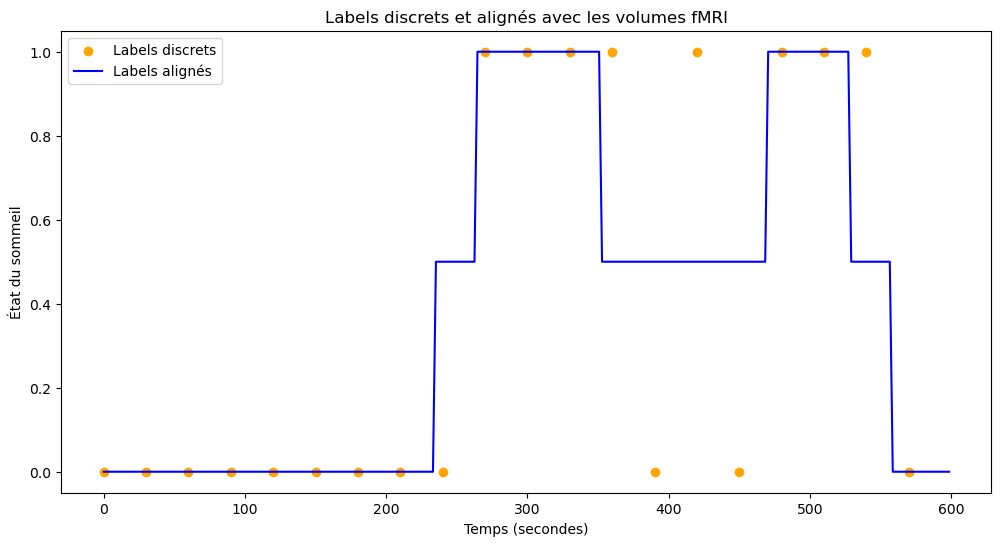

In [45]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Définir les chemins
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-04'
session = 'task-rest_run-1'  # Exemple de session

# Charger les données fMRI
fmri_path = os.path.join(dataset_path, subject, 'func', f'{subject}_{session}_bold.nii.gz')
if os.path.exists(fmri_path):
    fmri_img = nib.load(fmri_path)
    fmri_data = fmri_img.get_fdata()
    num_volumes = fmri_data.shape[-1]
    header = fmri_img.header
    tr = header.get_zooms()[-1]  # Temps de répétition (TR)
    acquisition_time = num_volumes * tr
    print(f'Nombre de volumes d\'IRM pour {subject} {session}: {num_volumes}')
    print(f'Temps d\'acquisition pour {subject} {session}: {acquisition_time:.2f} secondes')
else:
    print(f'File {fmri_path} not found.')

# Charger les données de sommeil
tsv_file = os.path.join(dataset_path, 'sourcedata', f'{subject}-sleep-stage.tsv')
if os.path.exists(tsv_file):
    sleep_data = pd.read_csv(tsv_file, sep='\t')
    session_data = sleep_data[sleep_data['session'] == session]
    num_labels = len(session_data)
    total_label_time = num_labels * 30  # 30 secondes par label
    print(f'Nombre total de labels pour {subject} {session}: {num_labels}')
    print(f'Temps total d\'acquisition des labels pour {subject} {session}: {total_label_time} secondes')
else:
    print(f'File {tsv_file} not found.')

# Afficher les labels discrets
discrete_labels = session_data['30-sec_epoch_sleep_stage'].map({'W': 0, '1': 1, '2': 1, '3': 1}).values
print(f'Labels discrets : {discrete_labels}')

# Créer un vecteur de temps pour les labels discrets
time_discrete_labels = np.arange(0, total_label_time, 30)

# Assigner les labels aux volumes fMRI
labels = np.zeros(num_volumes)
interval = int(30 / tr)  # Nombre de volumes par tranche de 30 secondes

for i in range(num_labels):
    start_idx = i * interval
    end_idx = start_idx + interval
    
    if i < num_labels - 1:
        current_stage = session_data.iloc[i]['30-sec_epoch_sleep_stage']
        next_stage = session_data.iloc[i+1]['30-sec_epoch_sleep_stage']
        
        if current_stage in ['1', '2', '3'] and next_stage in ['1', '2', '3']:
            labels[start_idx:end_idx] = 1  # Sommeil pour toute la période
        elif current_stage in ['1', '2', '3'] and next_stage == 'W':
            labels[start_idx:end_idx] = 0.5  # Sommeil pour la moitié de la période
        elif current_stage == 'W' and next_stage in ['1', '2', '3']:
            labels[start_idx:end_idx] = 0.5  # Sommeil pour la moitié de la période
        else:
            labels[start_idx:end_idx] = 0  # Éveil pour toute la période
    else:
        current_stage = session_data.iloc[i]['30-sec_epoch_sleep_stage']
        if current_stage in ['1', '2', '3']:
            labels[start_idx:end_idx] = 1  # Sommeil pour toute la période
        else:
            labels[start_idx:end_idx] = 0  # Éveil pour toute la période

# Créer un vecteur de temps pour les volumes fMRI
time_fmri = np.arange(0, acquisition_time, tr)

# Visualiser les labels discrets et alignés avec les volumes fMRI sur le même graphique
plt.figure(figsize=(12, 6))
plt.scatter(time_discrete_labels, discrete_labels, label='Labels discrets', color='orange', marker='o')
plt.plot(time_fmri, labels, label='Labels alignés', color='blue')
plt.xlabel('Temps (secondes)')
plt.ylabel('État du sommeil')
plt.title('Labels discrets et alignés avec les volumes fMRI')
plt.legend()
plt.show()

## Utilisation d'atlas

Since we're using rs-fmri data, it makes sense to use an atlas defined using rs-fmri data

This paper has many excellent insights about what kind of atlas to use for an rs-fmri machine learning task. See in particular Figure 5.
https://www.sciencedirect.com/science/article/pii/S1053811919301594?via%3Dihub

Let's use the MIST atlas (Urchs et al. 2019) 
* Created here in Montreal using the BASC method (Bellec et al., 2015). 
* Has multiple resolutions, for larger networks or finer-grained ROIs. 

Let's use a 64-ROI atlas to allow some detail, but to ultimately keep our connectivity matrices manageable

Here is a link to the MIST paper: https://mniopenresearch.org/articles/1-3

### All in one

Atlas ROIs are located in nifti image (4D) at: /home/rduchadeau/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Nombre de ROI dans l'atlas : 64


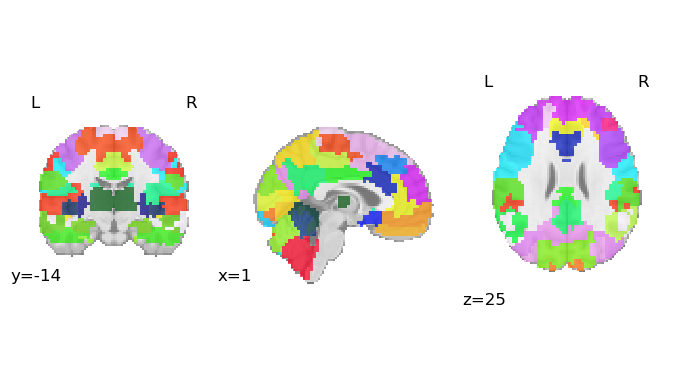

Session task-rest_run-1 trouvée dans fichier sub-02_task-rest_run-1_sec_540_label_2_preprocessed.nii.gz
Image path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fmri_preprocessed_data/sub-02/sub-02_task-rest_run-1_sec_540_label_2_preprocessed.nii.gz
Loaded 1 images with 1 labels for task-rest_run-1


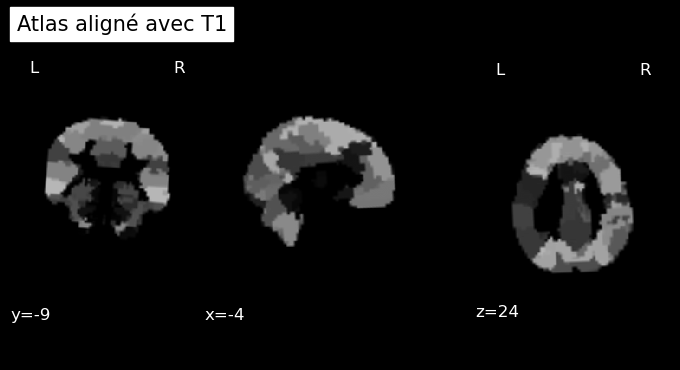

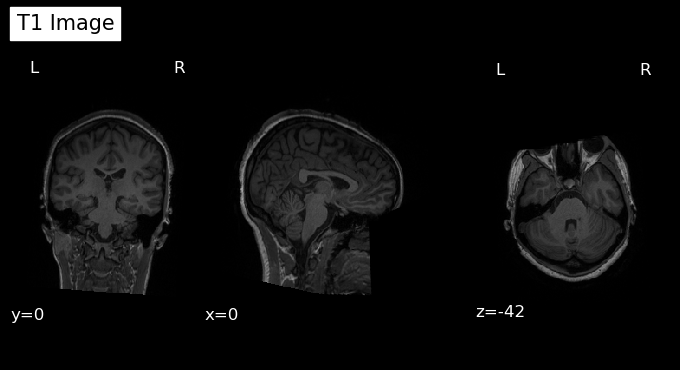

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image('/home/rduchadeau/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz')
Resampling labels
Shape of the ROI values: (1, 64)
Mean ROI values: [7.2471277e+02 7.2639728e+02 7.3069098e+02 7.1922791e+02 1.6354424e+02
 7.6478595e+02 7.3509979e+02 7.7441766e+02 4.7077664e+02 6.6321899e+02
 9.1250467e+00 2.2462611e+00 5.2888623e+02 2.5228825e+02 1.9299361e+00
 7.0672491e+02 7.2383386e+02 6.3519385e+02 3.5671112e+02 8.0546394e-02
 6.8451959e+02 5.9615997e+02 9.5811981e+01 5.2039874e+02 7.5558844e+02
 1.2842700e+02 5.0325044e-03 2.6669901e+02 3.2009738e+02 0.0000000e+00
 8.0452778e-04 3.6311942e+02 1.0220795e-01 8.3937842e+02 3.8411624e+02
 7.8299194e+02 3.4064963e+00 1.3244998e+02 3.7132071e+02 2.2319057e+01
 8.2201508e+02 9.0999713e+02 3.5362244e-02 4.9058537e+00 7.7422516e+01
 3.8324683e+02 2.7870491e+01 3.0672369e+02 3.2765701e+02 7.1295099e+02
 7.1274854e+

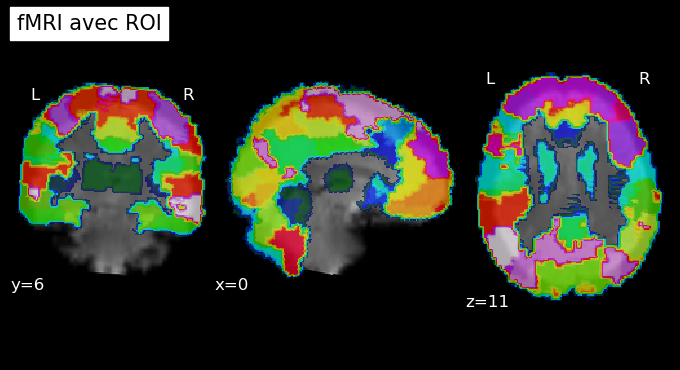

In [58]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, input_data
from nipype.interfaces.fsl import FLIRT
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
import numpy as np
from nilearn.image import resample_to_img

# ************* PATH definition *************
fmri_preprocessed_data_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fmri_preprocessed_data/'
output_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project'
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-02'
session = 'task-rest_run-1'

# ************* Load atlas *************
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064
# aal_atlas = datasets.fetch_atlas_aal()
# atlas_filename = aal_atlas.maps

print('Atlas ROIs are located in nifti image (4D) at: %s' % atlas_filename)

# Charger l'atlas pour vérifier le nombre de ROIs
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()

# Compter le nombre de ROI (étiquettes uniques, en excluant le fond)
unique_labels = np.unique(atlas_data)
num_rois = len(unique_labels) - 1  # Exclure le label de fond (généralement 0)
print(f"Nombre de ROI dans l'atlas : {num_rois}")

# Visualize atlas
plotting.plot_roi(atlas_filename, draw_cross=False)
plt.show()

# ************* Load data *************
def load_fmri_images(data_dir, dataset_path, subject, session):
    session_dir = os.path.join(data_dir, subject)
    images = []
    labels = []
    t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')
    T1_image = nib.load(t1_img_path)
    
    for file in os.listdir(session_dir):
        if session in file and file.endswith('.nii.gz'):
            print(f"Session {session} trouvée dans fichier {file}")
            file_path = os.path.join(session_dir, file)
            print(f"Image path : {file_path}")
            img = nib.load(file_path)
            images.append(img)
            
            # Extraire le label du nom du fichier
            label = file.split('_label_')[1].split('_preprocessed.nii.gz')[0]
            labels.append(int(label))
    
    return images, labels, T1_image

def plot_fmri_images(images, labels, session):
    for i, img in enumerate(images):
        plotting.plot_epi(img, title=f'{session} - Label: {labels[i]}')
        plt.show()

# Charger les images fMRI et les labels correspondants
images, labels, T1_image = load_fmri_images(fmri_preprocessed_data_path, dataset_path, subject, session)
print(f"Loaded {len(images)} images with {len(labels)} labels for {session}")

# ************* Align atlas with T1 *************
t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')

# Aligner l'atlas avec l'image T1
flirt = FLIRT()
flirt.inputs.in_file = atlas_filename
flirt.inputs.reference = t1_img_path
flirt.inputs.out_file = os.path.join(output_dir, 'atlas_to_T1.nii.gz')
flirt.inputs.dof = 6  # Degrees of freedom
flirt.inputs.cost = 'normmi'  # Normalized mutual information
flirt.inputs.interp = 'trilinear'  # Interpolation method
flirt.inputs.searchr_x = [-90, 90]  # Search angles
flirt.inputs.searchr_y = [-90, 90]
flirt.inputs.searchr_z = [-90, 90]
flirt_res = flirt.run()
aligned_atlas = nib.load(flirt_res.outputs.out_file)

# Vérification visuelle de l'alignement
plotting.plot_anat(aligned_atlas, title="Atlas aligné avec T1", draw_cross=False)
plotting.plot_anat(T1_image, title="T1 Image", draw_cross=False)
plt.show()

# ************* Apply atlas *************
# masker = input_data.NiftiLabelsMasker(labels_img=aligned_atlas, standardize=True, memory='nilearn_cache', verbose=1)

# # In my case, no confounds files 
# time_series = masker.fit_transform(images[0])
# # Vérifier la forme des séries temporelles
# print("Shape of the time series:", time_series.shape)

masker = NiftiLabelsMasker(labels_img=atlas_img, 
                           standardize=True, 
                           memory='nilearn_cache', 
                           verbose=1)

# Extraire les valeurs des ROI
roi_values = masker.fit_transform(images[0])

# Vérifier la forme des valeurs des ROI
print("Shape of the ROI values:", roi_values.shape)

# Utiliser les valeurs des ROI comme caractéristiques pour l'IA
features = roi_values

# Exemple de caractéristiques
print("Exemple de caractéristiques extraites des ROI :")
print(features)


# ************* Visualize fMRI data with ROI *************
# Résampler l'atlas aligné pour qu'il corresponde aux dimensions de l'image fMRI
resampled_atlas = resample_to_img(aligned_atlas, images[0], interpolation='nearest')

# Visualiser les données fMRI avec les ROI superposés
plotting.plot_roi(resampled_atlas, bg_img=images[0], title="fMRI avec ROI", draw_cross=False)
plt.show()




### Step by step

In [5]:
from nilearn import datasets
import nibabel as nib
import numpy as np
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064
# aal_atlas = datasets.fetch_atlas_aal()
# atlas_filename = aal_atlas.maps

print('Atlas ROIs are located in nifti image (4D) at: %s' %
       atlas_filename)

# Charger l'atlas pour vérifier le nombre de ROIs
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()

# Compter le nombre de ROI (étiquettes uniques, en excluant le fond)
unique_labels = np.unique(atlas_data)
num_rois = len(unique_labels) - 1  # Exclure le label de fond (généralement 0)
print(f"Nombre de ROI dans l'atlas : {num_rois}")

Atlas ROIs are located in nifti image (4D) at: /home/rduchadeau/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Nombre de ROI dans l'atlas : 64


Let's have a look 

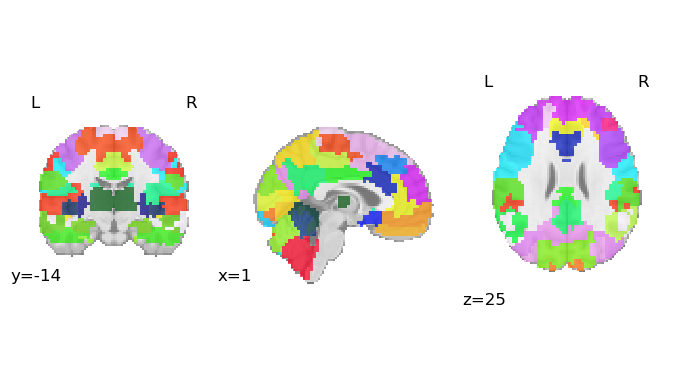

In [6]:
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=False)

Load one run of preprocessed datas for sub-01 

In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

def load_fmri_images(data_dir, dataset_path, subject, session):
    # print(f"Loading subject {subject} session {session}")
    session_dir = os.path.join(data_dir, subject)
    images = []
    labels = []
    t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')
    T1_image = nib.load(t1_img_path)
    
    for file in os.listdir(session_dir):
        if session in file and file.endswith('.nii.gz'):
            print(f"Session {session} trouvée dans fichier {file} ")
            file_path = os.path.join(session_dir, file)
            print (f"Image path : {file_path}")
            img = nib.load(file_path)
            images.append(img)
            
            # Extraire le label du nom du fichier
            label = file.split('_label_')[1].split('_preprocessed.nii.gz')[0]
            # print(f"Label extrait : {label}")
            labels.append(int(label))
    
    return images, labels, T1_image

def plot_fmri_images(images, labels, session):
    for i, img in enumerate(images):
        plotting.plot_epi(img, title=f'{session} - Label: {labels[i]}')
        plotting.show()

########## Main ###########
fmri_preprocessed_data_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fmri_preprocessed_data/'
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-02'
session = 'task-rest_run-1'

# Charger les images fMRI et les labels correspondants
images, labels, T1_image = load_fmri_images(fmri_preprocessed_data_path, dataset_path, subject, session)
print(f"Loaded {len(images)} images with {len(labels)} labels for {session}")

# Tracer toutes les images fMRI avec leurs labels
# plot_fmri_images(images, labels, session)
plotting.view_img(images[0], bg_img=T1_image, title="Image fMRI prétraitée").open_in_browser()


Align atlas to the T1 scan (so it will be aligned to preprocessed data)

In [ ]:

from nilearn import plotting, image, datasets, input_data
from nipype.interfaces.fsl import FLIRT

t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')
output_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project'

# Aligner l'atlas avec l'image T1
flirt = FLIRT()
flirt.inputs.in_file = atlas_filename
flirt.inputs.reference = t1_img_path
flirt.inputs.out_file = os.path.join(output_dir, 'atlas_to_T1.nii.gz')
flirt.inputs.dof = 6  # Degrees of freedom
flirt.inputs.cost = 'normmi'  # Normalized mutual information
flirt.inputs.interp = 'trilinear'  # Interpolation method
flirt.inputs.searchr_x = [-90, 90]  # Search angles
flirt.inputs.searchr_y = [-90, 90]
flirt.inputs.searchr_z = [-90, 90]
flirt_res = flirt.run()
aligned_atlas = nib.load(flirt_res.outputs.out_file)
# plotting.plot_anat(aligned_atlas, title="Atlas aligné avec T1")
plotting.view_img(aligned_atlas, bg_img=images[0], title="Atlas aligné").open_in_browser()

Let's do the feature extraction based on our atlas

In [38]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=aligned_atlas, 
                           standardize=True, 
                           memory='nilearn_cache', 
                           verbose=1)

# In my case, no confounds files 
time_series = masker.fit_transform(images[0])

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image('/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/atlas_to_T1.nii.gz')


In [39]:
time_series.shape

(1, 1163628)

64 zones d'intérêt et 1 timepoints

Compute and display a correlation matrix :


In [ ]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
correlation_matrix.shape

import numpy as np
# Faire en sorte de mettre la correlation de la diagonale à 0 
# (parceque c'est 1 évidemment mais on s'en fou)
np.fill_diagonal(correlation_matrix, 0)

# The labels we have start with the background (0), hence we skip the
# first label  
plotting.plot_matrix(correlation_matrix, figure=(6, 6),   
                     labels=range(time_series.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False)

# matrices are ordered for block-like representation

We can see that our data are highly correlated. That meens that there are lot of confounds and we really need to clean our data before using them.

Normally at this point we want to extract our features but we really need to clean the data before

## Other tests

### Test exploitation json

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


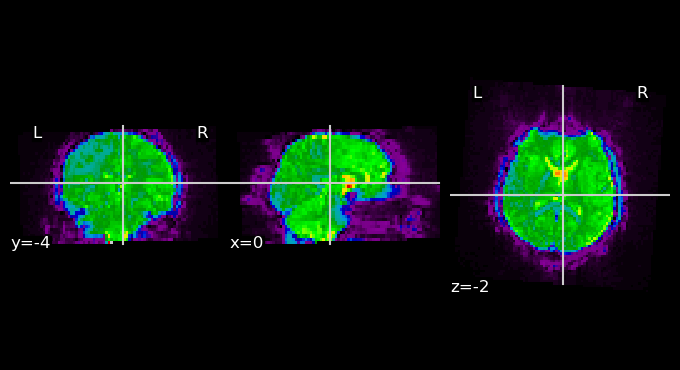

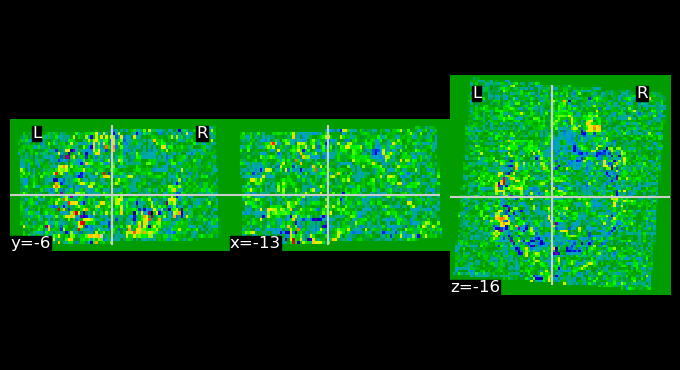

In [49]:
import json

# Charger les métadonnées JSON
json_file = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-1_bold.json'
with open(json_file, 'r') as f:
    metadata = json.load(f)

# Charger les données fMRI
fmri_file = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-1_bold.nii.gz'
fmri_img = nib.load(fmri_file)

# Visualisation de l'image
first_volume = image.index_img(fmri_img, 0)
plotting.plot_epi(first_volume)
plt.show()

# Extraire les temps de répétition et de synchronisation des tranches
tr = metadata['RepetitionTime']
slice_timing = metadata['SliceTiming']

# Correction du timing des tranches
fmri_img_corrected = image.clean_img(fmri_img, t_r=tr, slice_time_ref=0.5, standardize=True)

# Visualisation de l'image
first_volume = image.index_img(fmri_img_corrected, 0)
plotting.plot_epi(first_volume)
plt.show()


['task-rest_run-1']
Number of fmri_images :  1
Avant redressement: 


/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


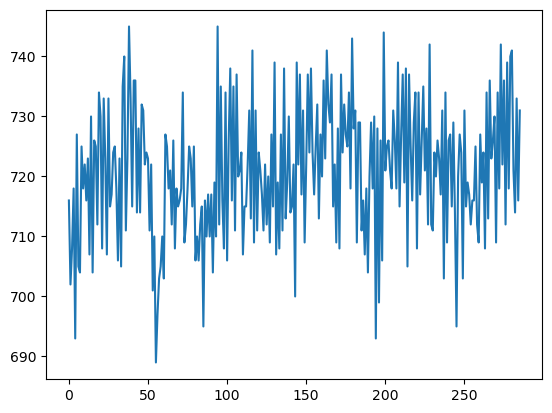

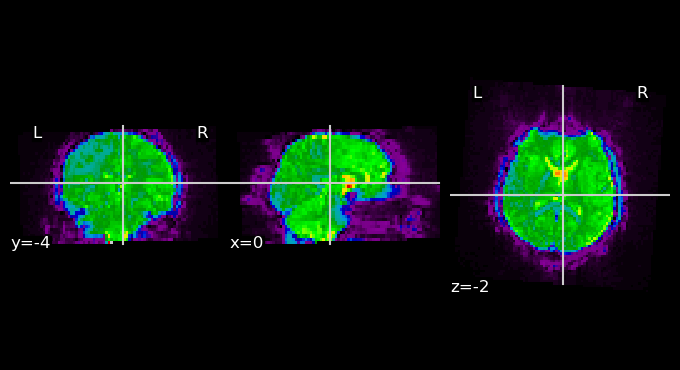

Après redressement: 


OSError: No command "dot" found on host BOOK-Romain. Please check that the corresponding package is installed.

In [27]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import mne
# Get the Node and Workflow object
from nipype import Node, Workflow

from nipype.algorithms.misc import Gunzip
from nipype.interfaces.fsl import ExtractROI
from nipype.interfaces.fsl import MCFLIRT
from nipype.interfaces.matlab import MatlabCommand


# Fonction pour charger les fichiers fMRI
def load_fmri_data(dataset_path, subjects, sessions):
    fmri_images = []
    for subj in subjects:
        for sess in sessions:
            fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
            if os.path.exists(fmri_path):
                # Charger l'image
                fmri_img = nib.load(fmri_path)
                plt.plot(nib.load(fmri_path).get_fdata()[32, 32, 15, :]);
                # Specify example input file
                # Initiate Gunzip node
                gunzip_func = Node(Gunzip(in_file=fmri_path), name='gunzip_func')
                extract = Node(ExtractROI(t_min=4, t_size=-1, output_type='NIFTI'), name="extract")
                # mcflirt = Node(MCFLIRT(mean_vol=True, save_plots=True), name="mcflirt")
                preproc.connect([(gunzip_func, extract, [('out_file', 'in_file')])])
                # Redresser l'image
                
                
                fmri_images.append(fmri_img)
            else:
                print(f"File {fmri_path} not found.")
    return fmri_images


# Fonction pour visualiser une image 4D
def visualize_4d_fmri(fmri_img):
    # Sélectionner la première image temporelle pour la visualisation
    first_volume = image.index_img(fmri_img, 0)
    plotting.plot_epi(first_volume)
    plt.show()

########## Main ###########
# Définir le chemin de base vers les données
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
preproc = Workflow(name='work_preproc', base_dir=dataset_path)
MatlabCommand.set_default_paths('/opt/spm12-r7219/spm12_mcr/spm12')

# Liste des sujets à charger
# subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
# for i in range(10, 34):
#     subjects.append(f'sub-{i:02d}')
subjects = ['sub-01']

# Liste des sessions
# sessions = [f'task-rest_run-{i}' for i in range(1, 9)] + [f'task-sleep_run-{i}' for i in range(1, 9)]
sessions = ['task-rest_run-1']
print(sessions)

# Charger les données fMRI
fmri_images= load_fmri_data(dataset_path, subjects, sessions)
print("Number of fmri_images : ", len(fmri_images))

print("Avant redressement: ")
visualize_4d_fmri(fmri_images[0])
print("Après redressement: ")

# Create preproc output graph
preproc.write_graph(graph2use='colored', format='png', simple_form=True)

# Visualize the graph
from IPython.display import Image
Image(filename='/output/work_preproc/graph.png', width=750)
